# Polynomial Regression

iterations: 5000 | alpha: 0.1 | deg: 5
-----------------------------------------------------------------------------------------
Iteration no. 0: cost 1.4409e+12
Iteration no. 500: cost 8.5247e+08
Iteration no. 1000: cost 6.4245e+07
Iteration no. 1500: cost 9.9815e+06
Iteration no. 2000: cost 2.8846e+06
Iteration no. 2500: cost 1.1570e+06
Iteration no. 3000: cost 5.5417e+05
Iteration no. 3500: cost 3.0846e+05
Iteration no. 4000: cost 1.9644e+05
Iteration no. 4500: cost 1.3873e+05
Iteration no. 4990: cost 1.055e+05
Iteration no. 4991: cost 1.054e+05
Iteration no. 4992: cost 1.054e+05
Iteration no. 4993: cost 1.053e+05
Iteration no. 4994: cost 1.052e+05
Iteration no. 4995: cost 1.052e+05
Iteration no. 4996: cost 1.051e+05
Iteration no. 4997: cost 1.051e+05
Iteration no. 4998: cost 1.050e+05
Iteration no. 4999: cost 1.050e+05
b,w found by gradient descent: 4757.59750808114, [[-1.73451597e+03 -5.27785727e+02 -8.87895741e+02 -2.03070238e+03
  -7.85728256e+02  9.43933344e+02  4.68850758e+02 

Text(0, 0.5, 'Cost')

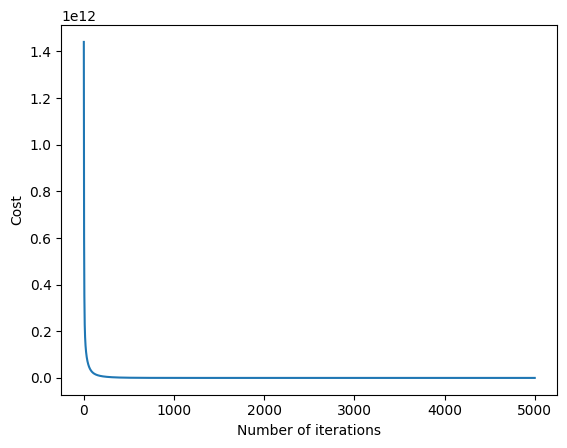

In [1]:
from ml_ai1 import *
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extraction of training sets
data = np.loadtxt("./polynomial_train.csv", delimiter=",", skiprows= 1)
X_train = data[:, 1:(data.shape[1] - 1)]
y_train = data[:, (data.shape[1] - 1)]

m, n = X_train.shape
X = X_train.copy()

m1, n1 = X.shape

algorithm = Ploynomial_Regression()

deg = algorithm.deg()

d = deg + 1  # To have degree 5 due to property of range last value it take is deg - 1
for i in range(d):
    for j in range(d):
        for k in range(d):
                # if (0 < i + j + k <= deg) and (i + j + k !=1):
                if (1 < i + j + k <= deg):
                    feature = (X_train[:, 0]**i) * (X_train[:, 1]**j) * (X_train[:, 2]**k)
                    X = np.column_stack((X, feature))

# Dimension of new train data
m1, n1 = X.shape

#Rescaling
mean = np.mean(X, axis=0).reshape(1, n1)
sigma = np.std(X, axis=0).reshape(1, n1)
X = (X - mean)/sigma

Xt = X.copy()  # For using later in graph to calculate y_pred

# Number of features
a = 0
for i in range(2, d):
    a += math.comb(i + 2, 2)
a1 = a + n

# Initialisation of weights and bias
wi = np.zeros(a1).reshape(1, a1)
bi = 0

# Hyperparameters
num_iters = 5000
p_l_rate = .1

# Training
print(f"iterations: {num_iters} | alpha: {p_l_rate} | deg: {deg}")
print("-----------------------------------------------------------------------------------------")
w_f, b_f, recJ = algorithm.p_find_wb(X[:30000, :], y_train[:30000], wi, bi, p_l_rate, num_iters, algorithm.p_cal_cost, algorithm.p_cal_grad, a1)
print(f"b,w found by gradient descent: {b_f}, {w_f}")


# Output
data_test = np.loadtxt('polynomial_test_data.csv', delimiter=',', skiprows=1)
X_test = (data_test[:, 1:(data.shape[1])])
X1 = X_test.copy()

for i in range(d):
    for j in range(d):
        for k in range(d):
                # if (0 < i + j + k <= deg) and (i + j + k !=1):
                if (1 < i + j + k <= deg):
                    feature = (X_test[:, 0]**i) * (X_test[:, 1]**j) * (X_test[:, 2]**k)
                    X1 = np.column_stack((X1, feature))

# Dimension of new test data
m1, n1 = X1.shape

#Rescaling
mean = np.mean(X1, axis=0).reshape(1, n1)
sigma = np.std(X1, axis=0).reshape(1, n1)
X1 = (X1 - mean)/sigma

output = []
# Normalising new test data
X1 = (X1 - mean)/sigma

for i in range(m1):
  out_i = cal_out(X1[i, :], w_f, b_f)
  output.append(out_i)

df = pd.DataFrame(data_test[:, 0])
df['Output'] = output
df.columns = ['ids', 'Output']

print(df)
df.to_csv("submission_poly.csv")

# Cost curve
plt.plot(np.arange(num_iters), recJ)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")


Rough

R2 Score: 0.9999999739983719
Error cv: 8.5019e+04
Variance: 169946.11973536614


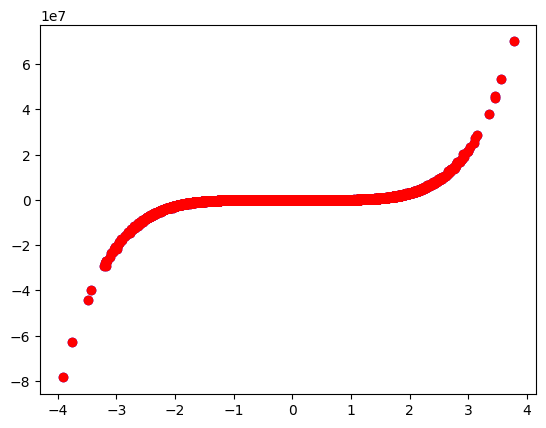

In [7]:
plt.scatter(Xt[30000:40000, 0], y_train[30000:40000], c='b')
plt.scatter(Xt[30000:40000, 0], np.matmul(Xt[30000:40000, :], w_f.T) + b_f, c='r')

mean = np.mean(y_train[30000:40000])
y_pred = (np.matmul(Xt[30000:40000, :], w_f.T) + b_f)
r2 = 1 - (np.sum((y_pred - y_train[30000:40000].reshape(10000, 1)) ** 2)/np.sum((y_pred - mean)**2))
err_cv = np.sum((y_pred - y_train[30000:40000].reshape(10000, 1)) ** 2)/ (2*y_pred.shape[0])
print(f"R2 Score: {r2}")
print(f"Error cv: {err_cv:.4e}")
print(f"Variance: {np.var(y_pred - y_train[30000:40000].reshape(10000, 1))}")


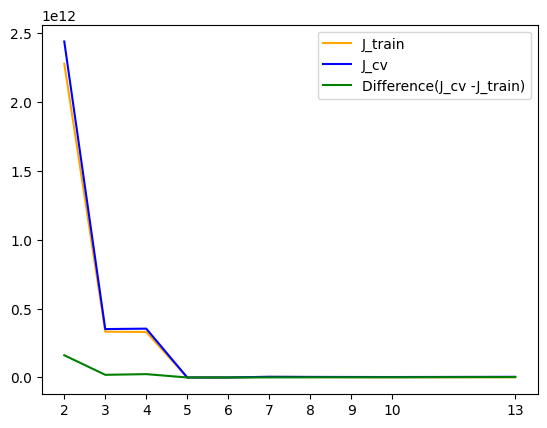

Difference: [ 1.6140e+11  1.9330e+10  2.4260e+10 -1.9981e+04  1.4524e+07  6.2180e+08
  1.1038e+09  1.3667e+09  1.4290e+09  2.9593e+09]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
deg = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 13])
j_train = np.array([2.279e+12, 3.323e+11, 3.304e+11, 1.050e+05, 7.597e+07, 4.474e+09, 3.072e+09, 2.269e+09, 1.826e+09, 1.812e+09])
j_cv = np.array([2.4404e+12, 3.5163e+11, 3.5466e+11, 8.5019e+04, 9.0494e+07, 5.0958e+09, 4.1758e+09, 3.6357e+09, 3.2550e+09, 4.7713e+09])
diff = np.array(j_cv) - np.array(j_train)
plt.plot(deg, j_train, c="orange")
plt.plot(deg, j_cv, c="b")
plt.plot(deg, diff, c="green")
plt.xticks(deg)
plt.legend(["J_train", "J_cv", "Difference(J_cv -J_train)"])
plt.show()
print(f"Difference: {diff}")

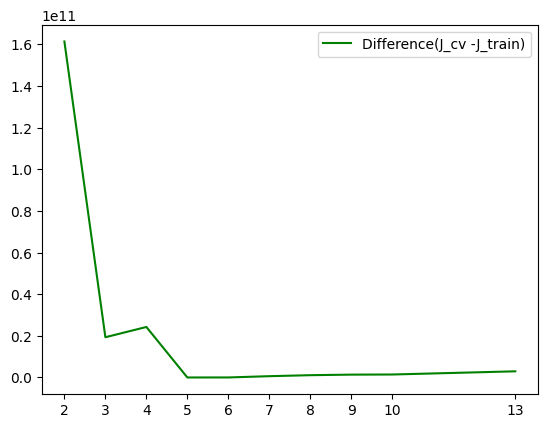

In [16]:
# Difference is minimum for deg = 5
plt.plot(deg, diff, c="green")
plt.xticks(deg)
plt.legend(["Difference(J_cv -J_train)"])
plt.show()